In [1]:
from sklearn.decomposition import PCA
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_selected = pd.read_csv('../results/outputs/selected_features.csv')  # your previous output

X = df_selected.drop('AQI_Category', axis=1) 
y = df_selected['AQI_Category']  #target

In [5]:
# Apply PCA
pca = PCA(n_components=min(5, X.shape[1]))  #up to 5 components
X_pca = pca.fit_transform(X)

# Print explained variance ratio
print("Explained variance ratio of PCA components:")
print(pca.explained_variance_ratio_)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['AQI_Category'] = y.values  # add target for plotting


Explained variance ratio of PCA components:
[0.35490703 0.30721687 0.10999158 0.09275664 0.04152989]


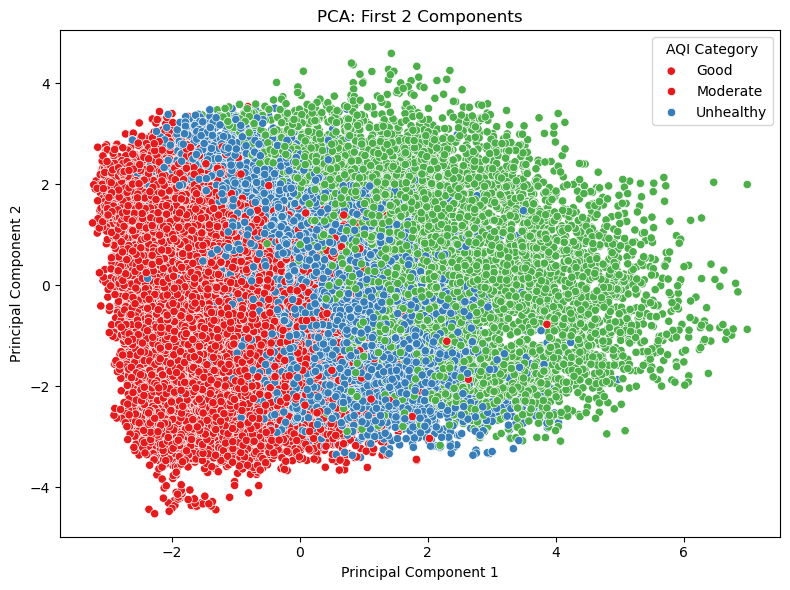

In [6]:
#EDA
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='AQI_Category', palette='Set1')
plt.title('PCA: First 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='AQI Category', labels=['Good','Moderate','Unhealthy'])
plt.tight_layout()
os.makedirs('../results/eda_visualizations', exist_ok=True)
plt.savefig('../results/eda_visualizations/pca_scatter.png')
plt.show()

In [7]:
os.makedirs('../results/outputs', exist_ok=True)
df_pca.to_csv('../results/outputs/pca_transformed_data.csv', index=False)